# Problem : Apartments prices in Nablus city

#### ** Nablus is a city located in the north of the West Bank in the State of Palestine. **

* ### The city is large, and apartment prices vary from one region to another, so it is difficult to easily predict the price of the apartment, so we decided to solve the problem with machine learning techniques.

<img src="nablus.jpg">

*  ### DataSet:
     We have collected data related to apartment prices in Nablus, which are about 80 records that were collected from the internet.

In [1]:
#importing part
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from joblib import dump, load

In [2]:
#read the data:
df = pd.read_excel('.\dataset.xlsx')

In [3]:
#view the data
df

,place,furnished,finished,Electronic elevator,Private parking,Number of kitchens,Number of bathrooms,number of bonds,number of halls,Number of bedrooms,Size,price
0,رفيديا والمناطق المحيطة,0.0,1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,128,45000
1,جامعة النجاح الجديدة والاماكن المحيطة,0.0,1,1.0,1.0,1.0,2.0,2.0,1.0,3.0,134,55000
2,المعاجين,0.0,1,NaN,1.0,1.0,1.0,1.0,1.0,2.0,90,40000
3,نابلس الجديدة والمخفية,0.0,0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,207,78660
4,المساكن الشعبية,0.0,0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,120,36000
...,...,...,...,...,...,...,...,...,...,...,...,...
75,رفيديا والمناطق المحيطة,NaN,1,1.0,1.0,1.0,2.0,1.0,1.0,2.0,106,43000
76,الجبل الشمالي من جهة شارع عصيرة,NaN,1,1.0,1.0,1.0,2.0,2.0,1.0,2.0,125,65000
77,رفيديا والمناطق المحيطة,NaN,1,1.0,1.0,1.0,2.0,1.0,1.0,3.0,120,58000
78,جامعة النجاح الجديدة والاماكن المحيطة,0.0,0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,196,65000


In [4]:
df.columns

Index(['place', 'furnished ', 'finished', 'Electronic elevator',
       'Private parking', 'Number of kitchens', 'Number of bathrooms',
       'number of bonds', 'number of halls', 'Number of bedrooms', 'Size',
       'price'],
      dtype='object')

---
As appears from ```df.columns``` that our dataset contains 12 columns:
 * place : The location of the apartment
 * furnished : 1 if the apartment is furnished and 0 if not
 * finished : 1 if the apartment is finished and 0 if not
 * Electronic elevator : 1 if there is an electronic elevator in the building and 0 if not
 * Private parking : 1 if there is a private car park and 0 if not
 * Number of kitchens
 * Number of bathrooms
 * Number of bonds
 * Number of halls
 * Number of bedrooms
 * Size: The size of the apartment in (m^2)
 * Price : The price of the apartment is in Jordanian dinars (JD)

In [5]:
#check types of columns
df.dtypes

place                   object
furnished              float64
finished                 int64
Electronic elevator    float64
Private parking        float64
Number of kitchens     float64
Number of bathrooms    float64
number of bonds        float64
number of halls        float64
Number of bedrooms     float64
Size                    object
price                   object
dtype: object

---------
We need to change the types of ```size``` and ```price``` because they are numbers!

In [6]:
df["Size"] = df["Size"].astype(int)
df["price"] = df["price"].astype(int)

#check types again..

df.dtypes

place                   object
furnished              float64
finished                 int64
Electronic elevator    float64
Private parking        float64
Number of kitchens     float64
Number of bathrooms    float64
number of bonds        float64
number of halls        float64
Number of bedrooms     float64
Size                     int32
price                    int32
dtype: object

In [7]:
#check count of rows in each columns
df.count()

place                  80
furnished              49
finished               80
Electronic elevator    67
Private parking        67
Number of kitchens     79
Number of bathrooms    79
number of bonds        78
number of halls        79
Number of bedrooms     79
Size                   80
price                  80
dtype: int64

Ooh! not all columns have data in 80 rows :( 
So there is a missing data and we need to fill it..

In [8]:
columns_with_missing_data = [column_name for column_name in df.columns if 
                            df[column_name].count() < 80 ]
print("We need to fill missing data in these columns:\n{}".format("\n".join(columns_with_missing_data)))

We need to fill missing data in these columns:
furnished 
Electronic elevator
Private parking
Number of kitchens
Number of bathrooms
number of bonds
number of halls
Number of bedrooms


All above columns, If the feature doesn't exist, the value is zero, so we're going to do the thing one time, not each column separately

In [9]:
df.fillna(0, inplace= True)

In [10]:
#check count again
df.count()

place                  80
furnished              80
finished               80
Electronic elevator    80
Private parking        80
Number of kitchens     80
Number of bathrooms    80
number of bonds        80
number of halls        80
Number of bedrooms     80
Size                   80
price                  80
dtype: int64

In [11]:
#view data 
df

,place,furnished,finished,Electronic elevator,Private parking,Number of kitchens,Number of bathrooms,number of bonds,number of halls,Number of bedrooms,Size,price
0,رفيديا والمناطق المحيطة,0.0,1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,128,45000
1,جامعة النجاح الجديدة والاماكن المحيطة,0.0,1,1.0,1.0,1.0,2.0,2.0,1.0,3.0,134,55000
2,المعاجين,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,2.0,90,40000
3,نابلس الجديدة والمخفية,0.0,0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,207,78660
4,المساكن الشعبية,0.0,0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,120,36000
...,...,...,...,...,...,...,...,...,...,...,...,...
75,رفيديا والمناطق المحيطة,0.0,1,1.0,1.0,1.0,2.0,1.0,1.0,2.0,106,43000
76,الجبل الشمالي من جهة شارع عصيرة,0.0,1,1.0,1.0,1.0,2.0,2.0,1.0,2.0,125,65000
77,رفيديا والمناطق المحيطة,0.0,1,1.0,1.0,1.0,2.0,1.0,1.0,3.0,120,58000
78,جامعة النجاح الجديدة والاماكن المحيطة,0.0,0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,196,65000


In [12]:
df.describe()

,furnished,finished,Electronic elevator,Private parking,Number of kitchens,Number of bathrooms,number of bonds,number of halls,Number of bedrooms,Size,price
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.00000,80.000000
mean,0.075000,0.737500,0.775000,0.800000,1.025000,2.12500,1.175000,1.212500,2.937500,149.87500,59598.250000
std,0.265053,0.442769,0.420217,0.402524,0.223607,0.66323,0.725224,0.566887,0.699797,35.37838,19104.006921
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,80.00000,8000.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,3.000000,123.75000,45000.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,2.00000,1.000000,1.000000,3.000000,150.00000,59500.000000
75%,0.000000,1.000000,1.000000,1.000000,1.000000,2.25000,2.000000,1.000000,3.000000,165.25000,70500.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,4.00000,3.000000,4.000000,5.000000,300.00000,120000.000000


```df.describe()``` shows that the minimum price is ```8000 JD``` and the maximum: ```120.000 JD``` and in average is ```59.598 JD```

19 apartments in رفيديا والمناطق المحيطة
4 apartments in جامعة النجاح الجديدة والاماكن المحيطة
6 apartments in المعاجين
8 apartments in نابلس الجديدة والمخفية
3 apartments in المساكن الشعبية
4 apartments in قرية عصيرة الشمالية
6 apartments in شارع تل
12 apartments in الجبل الشمالي من جهة شارع عصيرة
3 apartments in الجبل الشمالي
6 apartments in مناطق الجبل الجنوبي
4 apartments in جامعة النجاح القديمة والاماكن المحيطة
5 apartments in المخيم والمناطق المحيطة


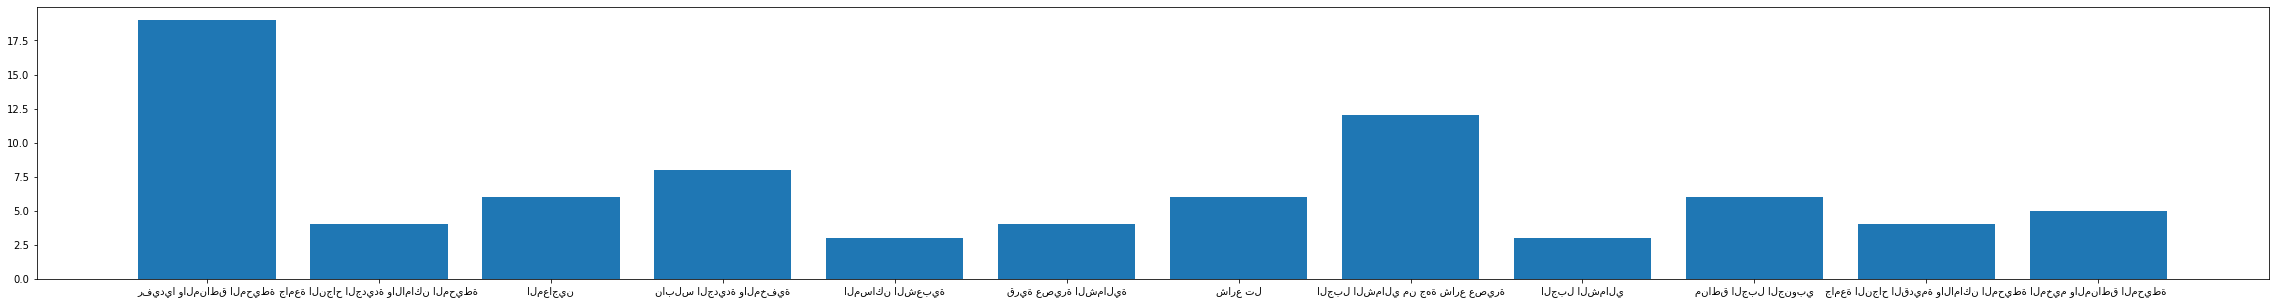

In [13]:
#The places of the apartments in our data and number of apartments in each place
places = {}
pls=[p for p in df.place.unique()]
for pl in pls :
    places [pl] = len(df[df.place== pl])
    
feg, ax = plt.subplots(figsize=(40,5));
bar = ax.bar(places.keys(),places.values())
for p in places.keys():
    print("{} apartments in {}".format(places[p],p))

In [14]:
X = df.drop("price", axis=1)
X.head()

,place,furnished,finished,Electronic elevator,Private parking,Number of kitchens,Number of bathrooms,number of bonds,number of halls,Number of bedrooms,Size
0,رفيديا والمناطق المحيطة,0.0,1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,128
1,جامعة النجاح الجديدة والاماكن المحيطة,0.0,1,1.0,1.0,1.0,2.0,2.0,1.0,3.0,134
2,المعاجين,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,2.0,90
3,نابلس الجديدة والمخفية,0.0,0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,207
4,المساكن الشعبية,0.0,0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,120


In [15]:
y = df["price"]
y.head()

0    45000
1    55000
2    40000
3    78660
4    36000
Name: price, dtype: int32

* ##### Feature Scaling
    The numbers in ```Size``` column are not in the same range, this may cause problems, the algorithm may consider that the higher number is more important for example! So we will try to put them in the same range.

In [16]:
size_data = list(X["Size"])
#scaler expected 2D array, so will reshape it..
size_data = np.reshape(size_data, (-1,1))
scaler = MinMaxScaler()
scaler.fit(size_data)
new_size_data = scaler.transform(size_data)
print(new_size_data)



[[0.21818182]
 [0.24545455]
 [0.04545455]
 [0.57727273]
 [0.18181818]
 [0.18181818]
 [0.38636364]
 [0.15909091]
 [0.40909091]
 [0.38636364]
 [0.18181818]
 [0.38636364]
 [0.36363636]
 [0.36363636]
 [0.18181818]
 [0.4       ]
 [0.34090909]
 [0.        ]
 [0.44090909]
 [0.25      ]
 [0.40909091]
 [0.22727273]
 [0.16818182]
 [0.77272727]
 [0.09090909]
 [0.36363636]
 [0.27272727]
 [0.22727273]
 [0.31818182]
 [0.36363636]
 [0.39090909]
 [0.31818182]
 [0.40909091]
 [0.13636364]
 [0.44090909]
 [0.68181818]
 [0.38636364]
 [0.36363636]
 [0.18181818]
 [0.36363636]
 [0.20454545]
 [0.45454545]
 [0.15909091]
 [0.29545455]
 [0.22727273]
 [0.18181818]
 [0.29545455]
 [0.31818182]
 [0.02272727]
 [0.34090909]
 [0.09090909]
 [0.36363636]
 [0.40909091]
 [0.38636364]
 [0.27272727]
 [0.28636364]
 [0.48636364]
 [0.29545455]
 [0.47727273]
 [0.09090909]
 [0.33636364]
 [0.38636364]
 [0.34090909]
 [0.22727273]
 [0.25      ]
 [1.        ]
 [0.54545455]
 [0.38636364]
 [0.18181818]
 [0.31818182]
 [0.44090909]
 [0.28

In [17]:
X["Size"]= [p[0] for p in new_size_data]
X

,place,furnished,finished,Electronic elevator,Private parking,Number of kitchens,Number of bathrooms,number of bonds,number of halls,Number of bedrooms,Size
0,رفيديا والمناطق المحيطة,0.0,1,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.218182
1,جامعة النجاح الجديدة والاماكن المحيطة,0.0,1,1.0,1.0,1.0,2.0,2.0,1.0,3.0,0.245455
2,المعاجين,0.0,1,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.045455
3,نابلس الجديدة والمخفية,0.0,0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,0.577273
4,المساكن الشعبية,0.0,0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,0.181818
...,...,...,...,...,...,...,...,...,...,...,...
75,رفيديا والمناطق المحيطة,0.0,1,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.118182
76,الجبل الشمالي من جهة شارع عصيرة,0.0,1,1.0,1.0,1.0,2.0,2.0,1.0,2.0,0.204545
77,رفيديا والمناطق المحيطة,0.0,1,1.0,1.0,1.0,2.0,1.0,1.0,3.0,0.181818
78,جامعة النجاح الجديدة والاماكن المحيطة,0.0,0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,0.527273


---------

* Another thing : all data is numbers except the data in ```place``` column, will face problem when fit it in the model..
So we need to convert it to numbers!


In [18]:
#Turn the categories into numbers
categorical_features = ["place"]
one_hot = OneHotEncoder ()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                 remainder="passthrough")

transformed_X =  transformer.fit_transform(X)

#To see X after transformed
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,0.218182
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,3.0,0.245455
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.045455
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3.0,2.0,1.0,3.0,0.577273
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,0.181818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,0.118182
76,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,0.204545
77,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,3.0,0.181818
78,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,1.0,3.0,2.0,2.0,3.0,0.527273


* ##### Spliting the data

In [19]:
#np.random.seed() makes the random numbers predictable

np.random.seed(14)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size = 0.2)

*  ### Build our machine learning model

In [20]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

pr = pd.DataFrame(data={"Actual values":y_test, "Predicted values":y_pred})
pr["differences"] = pr["Predicted values"] - pr["Actual values"]

print(pr)

print(f"- The score of our model : {regr.score(X_test,y_test)} -")

    Actual values  Predicted values   differences
38          50000      44735.877783  -5264.122217
6           39000      59172.984829  20172.984829
33          41000      39621.745973  -1378.254027
2           40000      41001.908431   1001.908431
48          40000      40822.419542    822.419542
78          65000      71168.660746   6168.660746
76          65000      52683.468085 -12316.531915
53          70000      65468.284434  -4531.715566
46          72500      58476.581566 -14023.418434
34          84000      75002.152790  -8997.847210
35          80000      76918.458105  -3081.541895
8           62000      66868.724334   4868.724334
20          80000      74530.743390  -5469.256610
24          40000      41001.908431   1001.908431
79          47000      44623.403629  -2376.596371
42          48000      44623.403629  -3376.596371
- The score of our model : 0.7492996831853178 -


* ### Evaluating our model

In [21]:
#Evaluating using R^2, CV, MAE
print(f"Evaluation using R^2 : {regr.score(X_test,y_test)} ")
eval_cv = cross_val_score(regr, transformed_X, y, cv=5)
print(f"Evaluation using Cross validation : {eval_cv}\n\t\t\t\tand in average is  {np.mean(eval_cv)} ")
print(f"Evaluation using MAE: {mean_absolute_error(y_test, y_pred)}")


Evaluation using R^2 : 0.7492996831853178 
Evaluation using Cross validation : [0.67526472 0.52143189 0.27598113 0.49514413 0.06213894]
				and in average is  0.40599216304176267 
Evaluation using MAE: 5928.280433030983


The results from ```np.mean(df["price"])``` = 59598.25
and ```MAE``` = 5928.280433030983,
Now a simple calculation will tell us that the error is about 10% of mean apartment price.

* ### Improving our model by tuning hyperparameters

In [22]:

grid = {'n_estimators': [10,50,100,150,200],
        'max_depth': [None,10,20,50],
        'min_samples_split': [2,4,6,8],
        'random_state':[0]
        }
our_regr_Gcv= GridSearchCV(estimator=RandomForestRegressor(),
                           param_grid=grid,
                           cv=5,
                           verbose=2)
our_regr_Gcv.fit(transformed_X, y)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] max_depth=None, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=10, random_state=0, total=   0.0s
[CV] max_depth=None, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=10, random_state=0, total=   0.0s
[CV] max_depth=None, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=10, random_state=0, total=   0.0s
[CV] max_depth=None, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=10, random_state=0, total=   0.0s
[CV] max_depth=None, min_samples_split=2, n_estimators=10, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=10, random_state=0, total=   0.0s
[CV] max_depth=None, min_samples_split=2, n_estimators=50, random_state=0 
[CV]  max_depth=None, min_samples_spli

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  max_depth=None, min_samples_split=2, n_estimators=50, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=2, n_estimators=50, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=50, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=2, n_estimators=50, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=50, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=2, n_estimators=50, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=50, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=None, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=2, n_estimators=100, random_state=0 
[CV] 

[CV]  max_depth=None, min_samples_split=6, n_estimators=50, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=6, n_estimators=50, random_state=0 
[CV]  max_depth=None, min_samples_split=6, n_estimators=50, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=None, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=None, min_samples_split=6, n_estimators=100, random_state=0, total=   0.2s
[CV] max_depth=None, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=None, min_samples_split=6, n_estimators=100, random_state=0, total=   0.2s
[CV] max_depth=None, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=None, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=None, min_samples_split=6, n_estimators=100, random_state=0 
[

[CV]  max_depth=10, min_samples_split=2, n_estimators=50, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=2, n_estimators=100, random_state=0, total=   0.2s
[CV] max_depth=10, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=10, min

[CV]  max_depth=10, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=6, n_estimators=100, random_state=0, total=   0.2s
[CV] max_depth=10, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=6, n_estimators=100, random_state=0, total=   0.2s
[CV] max_depth=10, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=10, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=10, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=10, min_samples_split=6, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=10, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=10, mi

[CV]  max_depth=20, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=20, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=20, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=20, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=20, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=20, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=20, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=20, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=20, min_samples_split=2, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=20, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=20, min_samples_split=2, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=20, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=20, mi

[CV]  max_depth=20, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=20, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=20, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=20, min_samples_split=6, n_estimators=100, random_state=0 
[CV]  max_depth=20, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=20, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=20, min_samples_split=6, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=20, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=20, min_samples_split=6, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=20, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=20, min_samples_split=6, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=20, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=20, mi

[CV]  max_depth=50, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=50, min_samples_split=2, n_estimators=100, random_state=0 
[CV]  max_depth=50, min_samples_split=2, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=50, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=2, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=50, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=2, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=50, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=2, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=50, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=2, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=50, min_samples_split=2, n_estimators=150, random_state=0 
[CV]  max_depth=50, mi

[CV]  max_depth=50, min_samples_split=6, n_estimators=100, random_state=0, total=   0.1s
[CV] max_depth=50, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=6, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=50, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=6, n_estimators=150, random_state=0, total=   0.3s
[CV] max_depth=50, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=6, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=50, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=6, n_estimators=150, random_state=0, total=   0.3s
[CV] max_depth=50, min_samples_split=6, n_estimators=150, random_state=0 
[CV]  max_depth=50, min_samples_split=6, n_estimators=150, random_state=0, total=   0.2s
[CV] max_depth=50, min_samples_split=6, n_estimators=200, random_state=0 
[CV]  max_depth=50, mi

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 10, 20, 50],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, 150, 200],
                         'random_state': [0]},
             verbose=2)

In [23]:
our_regr_Gcv.best_params_

{'max_depth': 10,
 'min_samples_split': 2,
 'n_estimators': 150,
 'random_state': 0}

* ### Building the model again with new hyperparameters and re-evaluating it

In [24]:
regr = RandomForestRegressor(max_depth=10, min_samples_split=2, n_estimators=150, random_state=0)
regr.fit(X_train,y_train)
y_pred = regr.predict(X_test)

pr = pd.DataFrame(data={"Actual values":y_test, "Predicted values":y_pred})
pr["differences"] = pr["Predicted values"] - pr["Actual values"]

print(pr)

print(f"- The score of our model : {regr.score(X_test,y_test)} -")
#Evaluating using R^2, CV, MAE
print(f"Evaluation using R^2 : {regr.score(X_test,y_test)} ")
eval_cv = cross_val_score(regr, transformed_X, y, cv=5)
print(f"Evaluation using Cross validation : {eval_cv}\n\t\t\t\tand in average is  {np.mean(eval_cv)} ")
print(f"Evaluation using MAE: {mean_absolute_error(y_test, y_pred)}")


    Actual values  Predicted values   differences
38          50000      42814.814815  -7185.185185
6           39000      43410.000000   4410.000000
33          41000      30400.000000 -10600.000000
2           40000      37806.666667  -2193.333333
48          40000      37773.333333  -2226.666667
78          65000      71543.366667   6543.366667
76          65000      53039.833333 -11960.166667
53          70000      68112.939555  -1887.060445
46          72500      61472.619048 -11027.380952
34          84000      82039.407407  -1960.592593
35          80000      79835.200000   -164.800000
8           62000      69240.534961   7240.534961
20          80000      83614.248148   3614.248148
24          40000      38560.000000  -1440.000000
79          47000      43486.666667  -3513.333333
42          48000      43486.666667  -4513.333333
- The score of our model : 0.8485868649083516 -
Evaluation using R^2 : 0.8485868649083516 
Evaluation using Cross validation : [0.79834263 0.8135766  

###### After trying to improve the model, the ```R^2``` value improved from ```0.783```  to ```0.848```,
######  Also the evaluation using Cross validation in average improved from ```0.567```  to ```0.597```
######  And the MAE decreased from ```5928``` to ```5030``` which means the error now in mean apartment price is about 8.5% rather than 10%
-------


* ### Save our model

In [25]:
dump(regr, 'nablus_apartments.joblib') 

['nablus_apartments.joblib']

In [26]:
dump(scaler, 'our_scaler.joblib')

['our_scaler.joblib']

In [27]:
dump(transformer, 'our_transformer.joblib')

['our_transformer.joblib']